In [2]:
%matplotlib inline

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import time as t
from sklearn import preprocessing as pre

path="C:\\dev\\telstra\\data\\"

trainFile="train.csv"
testFile="test.csv"
resourceFile="resource_type.csv"
eventTypeFile="event_type.csv"
logFeatureFile="log_feature.csv"
severityTypeFile="severity_type.csv"

test=pd.read_csv(filepath_or_buffer=path+testFile,delimiter=",",header=0)
train=pd.read_csv(filepath_or_buffer=path+trainFile,delimiter=",",header=0)

resource=pd.read_csv(filepath_or_buffer=path+resourceFile,delimiter=",",header=0)
event=pd.read_csv(filepath_or_buffer=path+eventTypeFile,delimiter=",",header=0)
feature=pd.read_csv(filepath_or_buffer=path+logFeatureFile,delimiter=",",header=0)
severity=pd.read_csv(filepath_or_buffer=path+severityTypeFile,delimiter=",",header=0)
join=pd.DataFrame({'id':[]})
datasets={'train':train,'test':test,'resource':resource,'event':event,'feature':feature,'severity':severity}
notCat=['id','volume']


#creates join dataset table that will store features for train and test datasets
datasets['train']['sample']='train'
datasets['test']['sample']='test'
datasets['test']['fault_severity']=np.nan
join=pd.concat([datasets['train'],datasets['test']],ignore_index=True)

#joins features from different datasets into one dataframe, features only for evaluated ids are extracted
#(i.e. some features may be not related to any id)
#samples=['train','test']
#for key, dataset in datasets.items():
#    if key not in samples:
#        join=pd.merge(join,dataset,on='id',how='left') #can use concat?

#join=join.set_index(['sample',join.index])

#convert table of ids and classes to binary row feature vectors for each unique id
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in join.columns:
    if column not in notCat:
        join[column]=le.fit_transform(join[column])

#normalizes a continuous feature
join['volume']=pre.scale(join['volume'])

#fills in missing data
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
join = DataFrameImputer().fit_transform(join)
#join=join.fillna(value=0)

#creates features and targets for final training
features=join.columns.values
features=features[2:]

train_features = join.loc['train'][features]
train_target = join.loc['train']['fault_severity']

test_features = join.loc['test'][features]

KeyError: 'volume'

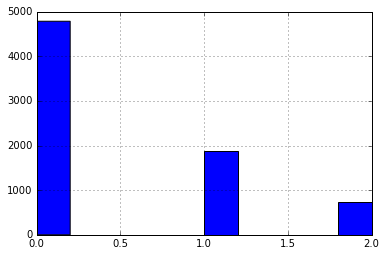

In [10]:
join.loc['train']['fault_severity'].hist()
plt.show()

In [18]:
join.loc['train']['location'].plot(kind='hist')
plt.show()

KeyError: 'the label [train] is not in the [index]'

In [19]:
join

,fault_severity,id,location,sample
0,1,14121,148,1
1,0,9320,1027,1
2,1,14394,186,1
3,1,8218,1051,1
4,0,14804,151,1
5,0,1080,754,1
6,0,9731,728,1
7,0,15505,153,1
8,1,3443,309,1
9,1,13300,698,1
